# Assignment #8

Name:

    Angel Manuel Perez

# Chapter 09 (page  398): 5, 7, 8

In [1]:
import ISLP as isl
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import patsy as pt

sns.set(rc={'figure.figsize':(10,10)})

# 9.5
## We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

### (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(123)

# Generate data
n = 500
x1 = np.random.uniform(0, 1, n) - 0.5
x2 = np.random.uniform(0, 1, n) - 0.5
y = 1 * (x1**2 - x2**2 > 0)  # Quadratic decision boundary


### (b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis.


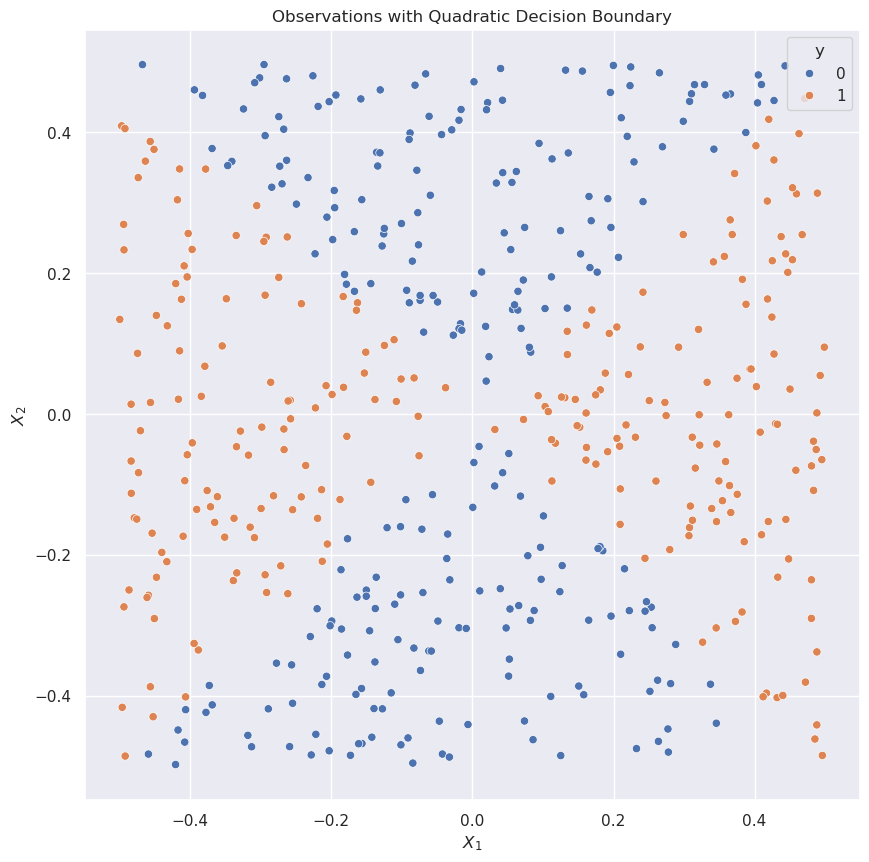

In [3]:
# Plot data
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=data)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Observations with Quadratic Decision Boundary')
plt.show()

### (c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.


In [15]:
np.random.seed(123)

train = np.random.random(len(y)) > 0.5
# Select linear predictor variables
X_linear = data[['x1', 'x2']]

# Fit logistic regression model
model_linear = LogisticRegression()
model_linear.fit(X_linear[train], y[train])

# Print coefficients of the model
print("Coefficients of the logistic regression model with linear features:")
for feature, coef in zip(X_linear.columns, model_linear.coef_[0]):
    print(f"{feature}: {coef}")

# Print intercept of the model
print("Intercept of the logistic regression model with linear features:", model_linear.intercept_[0])

Coefficients of the logistic regression model with linear features:
x1: 4.705450498084358
x2: -0.831222615102078
Intercept of the logistic regression model with linear features: -1.046106712173172


### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

Training accuracy with linear features: 0.7283950617283951


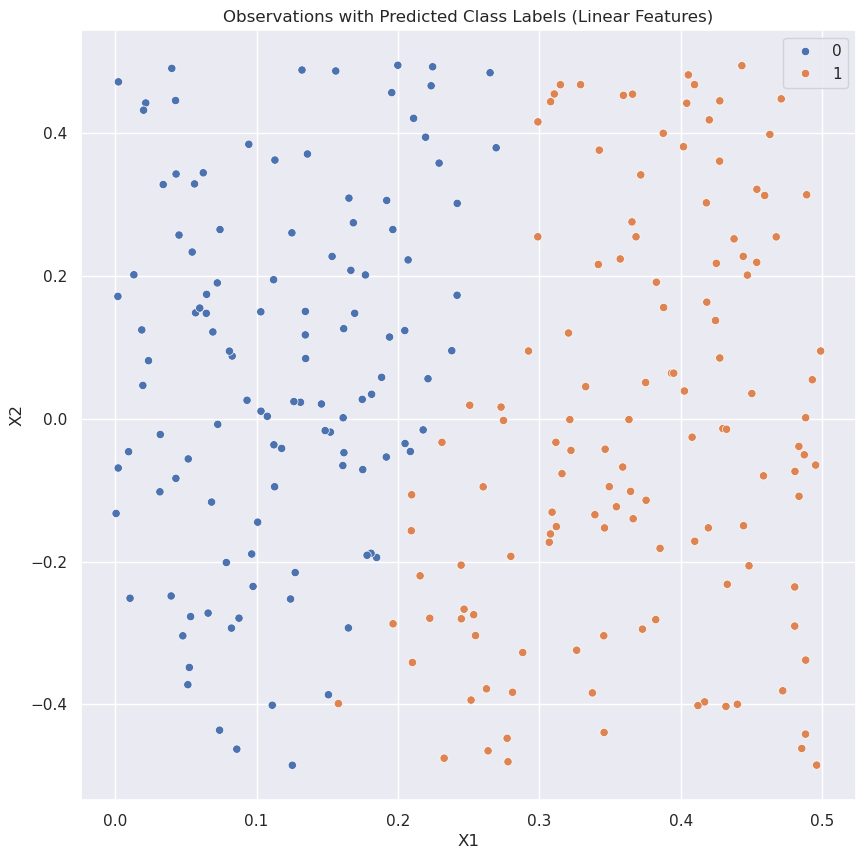

In [14]:
# Apply the model to the training data to obtain predicted class labels
predicted_labels_train_linear = model_linear.predict(X_linear[train])

# Calculate training accuracy
train_accuracy_linear = np.mean(predicted_labels_train_linear == y[train])
print(f'Training accuracy with linear features: {train_accuracy_linear}')

# Plot the observations colored according to the predicted class labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue=predicted_labels_train_linear, data=data.iloc[train])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations with Predicted Class Labels (Linear Features)')
plt.show()

### (e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_{12}$, $X_1 \times X_2$, $log(X_2)$, and so forth).


In [26]:
from sklearn.metrics import accuracy_score

# Define the features for the specific models
features_to_test = [
    ['x1_x2'],  # X1 * X2
    ['log_x2'],  # Log(X2)
    ['x1', 'x2']  # X1 and X2
]

# Dictionary to store accuracy scores for each model
accuracy_scores = {}

# Fit logistic regression models for each feature set
for features in features_to_test:
    X_subset = X_nonlinear[features]
    X_train = X_subset[train]
    y_train = data['y'][train]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    predicted_labels_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, predicted_labels_train)
    accuracy_scores[tuple(features)] = accuracy
    
# Convert accuracy scores to a pandas DataFrame
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Features', 'Accuracy'])

# Sort DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame
print("Accuracy scores for each model:")
print(accuracy_df)

# Select the best model based on highest accuracy
best_model_features = accuracy_df.iloc[0, 0]
best_model_accuracy = accuracy_df.iloc[0, 1]
print("\nBest model:")
print(f"Features: {best_model_features}, Accuracy: {best_model_accuracy}")

# Now you can use 'best_model_features' to retrieve the features of the best model
# and 'best_model_accuracy' to retrieve its accuracy for later use

Accuracy scores for each model:
    Features  Accuracy
2   (x1, x2)  0.985507
1  (log_x2,)  0.739130
0   (x1_x2,)  0.507246

Best model:
Features: ('x1', 'x2'), Accuracy: 0.9855072463768116


In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Pre-process data with quadratic and non-linear features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[['x1', 'x2']])
X_poly = np.hstack((X_poly, np.log(data[['x2']])))  # Add logarithmic feature for x2
y = data['y']

# Split data into train and test sets
train = np.random.random(len(y)) > 0.5

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_poly[train], y[train])

# Predict
y_pred_train = model.predict(X_poly[train])

# Plot data
plot_df = pd.DataFrame({'x1': df['x1'], 'x2': df['x2'], 'y_pred': y_pred_train})
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x1', y='x2', hue='y_pred', data=plot_df, palette='coolwarm', legend='full')
plt.title('Predicted Class Labels on Training Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Print training accuracy
train_accuracy = model.score(X_poly[train], y[train])
print(f"Training Accuracy: {train_accuracy}")


/opt/conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.


### (g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

 

### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.


### (i) Comment on your results.

# 9.7
## In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.


### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.


### (b) Fit a support vector classifier to the data with various values of C, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different val- ues of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to pro- duce sensible results.


### (c) Now repeat (b), this time using SVMs with radial and polyno- mial basis kernels, with different values of gamma and degree and C. Comment on your results.


### (d) Make some plots to back up your assertions in (b) and (c).
#### Hint: In the lab, we used the plot_svm() function for fitted SVMs. When p > 2, you can use the keyword argument features to create plots displaying pairs of variables at a time.

# 9.8
## This problem involves the OJ data set which is part of the ISLP package.


### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.


### (b) Fit a support vector classifier to the training data using C = 0.01, with Purchase as the response and the other variables as predictors. How many support points are there?


### (c) What are the training and test error rates?


### (d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.


### (e) Compute the training and test error rates using this new value for C.

### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.


### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.


### (h) Overall, which approach seems to give the best results on this data?